In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


file_path = "data/xray_detection/AuAu/Photocurrent_vs_time_-5V_3_X_ray_pulses_50kV_79uA.dat"
data = pd.read_csv(file_path, sep = "\t")

time = data['Time (s)']
current = -data['Current (A)']


plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('log(I / A)')
plt.grid(True)
plt.show()

In [ ]:
mask1 = (time >= 0) & (time <= 27) | (time >= 39) & (time <= 50) | (time >= 64) & (time <= 73)| (time >= 84)
notmask1 = np.logical_not(mask1)

filtered_time = time[mask1]
filtered_current = current[mask1]

def poly2(x, a, b, c):
    return a*x**2 + b*x + c

def exp_decay(x, a, b, c):
    return a * np.exp(-b*x) + c

params_quad_noxray, _ = curve_fit(poly2, filtered_time, filtered_current)
quad_a, quad_b, quad_c = params_quad_noxray

params_exp_noxray, _ = curve_fit(exp_decay, filtered_time, filtered_current)
params_exp_xray, _ = curve_fit(exp_decay, time[notmask1], current[notmask1])

timeseq = np.linspace(0, 90, num = 100)
mask2 = (timeseq >= 0) & (timeseq <= 27) | (timeseq >= 39) & (timeseq <= 50) | (timeseq >= 64) & (timeseq <= 73)| (timeseq >= 84)
mask2 = np.logical_not(mask2)

I_fit_quad = poly2(timeseq, *params_quad_noxray)
I_fit_exp_noxray = exp_decay(timeseq, *params_exp_noxray)
I_fit_exp_xray = exp_decay(timeseq, *params_exp_xray)

photocurrent = I_fit_exp_xray[mask2] - I_fit_exp_noxray[mask2]
np.mean(photocurrent)



In [ ]:
mask1 = (time >= 0) & (time <= 27) | (time >= 39) & (time <= 50) | (time >= 64) & (time <= 73)| (time >= 84)
notmask1 = np.logical_not(mask1)

filtered_time = time[mask1]
filtered_current = current[mask1]

def poly2(x, a, b, c):
    return a*x**2 + b*x + c

def exp_decay(x, a, b, c):
    return a * np.exp(-b*x) + c

params_quad_noxray, _ = curve_fit(poly2, filtered_time, filtered_current)
quad_a, quad_b, quad_c = params_quad_noxray

params_exp_noxray, _ = curve_fit(exp_decay, filtered_time, filtered_current)
params_exp_xray, _ = curve_fit(exp_decay, time[notmask1], current[notmask1])

timeseq = np.linspace(0, 90, num = 100)
mask2 = (timeseq >= 0) & (timeseq <= 27) | (timeseq >= 39) & (timeseq <= 50) | (timeseq >= 64) & (timeseq <= 73)| (timeseq >= 84)
mask2 = np.logical_not(mask2)

I_fit_quad = poly2(timeseq, *params_quad_noxray)
I_fit_exp_noxray = exp_decay(timeseq, *params_exp_noxray)
I_fit_exp_xray = exp_decay(timeseq, *params_exp_xray)

photocurrent = I_fit_exp_xray[mask2] - I_fit_exp_noxray[mask2]
np.mean(photocurrent)



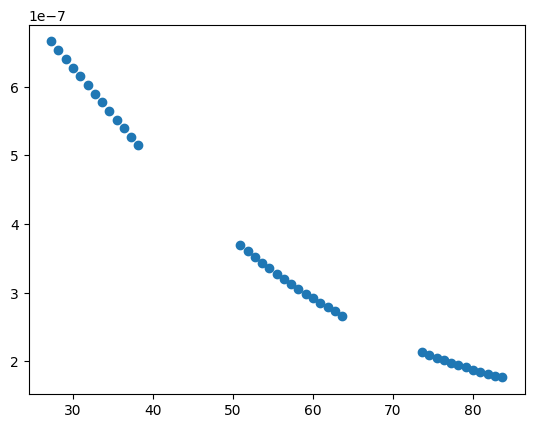

In [147]:
plt.scatter(timeseq[mask2], photocurrent)

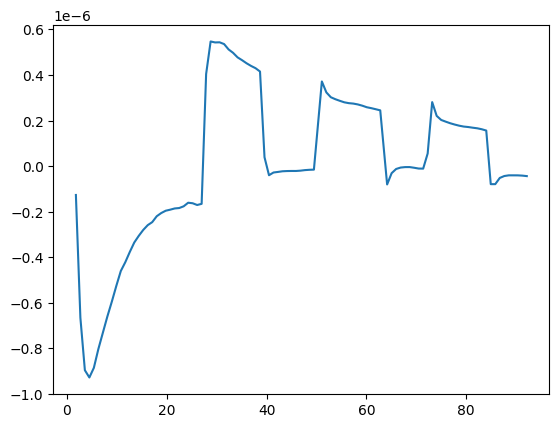

In [148]:
plt.plot(time, current - I_fit_exp_noxray)